In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

#### Download and first look at the data

In [2]:
mlc=pd.read_csv('../data/Matching_Sample.csv')

In [3]:
mlc.head(2)

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,3/1/2021,Apple,"16,216,932",Drake,OVO,Lemon Pepper Freestyle (feat. Rick Ross),Scary Hours 2,383,1
1,USRC12100543,US,RC1,21.0,4/1/2021,Spotify,"21,456,166","Doja Cat,SZA",Kemosabe Records/RCA Records,Kiss Me More (feat. SZA),Kiss Me More (feat. SZA),209,1


#### Checking the tail end for bad data

In [4]:
mlc.tail()

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"1,987,400",Penelope Scott,Tesla's Pigeon,Rät,Public Void,195,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"1,987,400",Penelope Scott,Tesla's Pigeon,Rät,Public Void,195,1
99997,SE6HN1926755,SE,6HN,19.0,5/1/2021,Spotify,"1,380,829",awfultune,awfultune,I Met Sarah in the Bathroom,I Met Sarah in the Bathroom,122,1
99998,SEYOK1669274,SE,YOK,16.0,5/1/2021,Spotify,"1,531,690",Vacations,Nettwerk Records,Young,Vibes,190,1
99999,QZK6F2019397,QZ,K6F,20.0,5/1/2021,Spotify,"1,768,669",Penelope Scott,Tesla's Pigeon,Rät,Public Void,195,1


In [5]:
mlc.columns = ['ISRC', 'Country', 'Registrant', 'Release_Year', 'Period', 'DSP', 'Streams', 'Artist', 'Label', 'Song', 'Album', 'Duration', 'Songwriter?']
mlc

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
0,USUG12101043,US,UG1,21.0,3/1/2021,Apple,"16,216,932",Drake,OVO,Lemon Pepper Freestyle (feat. Rick Ross),Scary Hours 2,383,1
1,USRC12100543,US,RC1,21.0,4/1/2021,Spotify,"21,456,166","Doja Cat,SZA",Kemosabe Records/RCA Records,Kiss Me More (feat. SZA),Kiss Me More (feat. SZA),209,1
2,USSM12102263,US,SM1,21.0,NaN,Apple,"15,747,471",DJ Khaled,Epic/We The Best,EVERY CHANCE I GET (feat. Lil Baby & Lil Durk),KHALED KHALED,237,1
3,USLD91731547,US,LD9,17.0,4/1/2021,Apple,"17,259,260",Rod Wave,Alamo Records,Tombstone,SoulFly,160,1
4,USAT22007048,US,AT2,20.0,3/1/2021,Apple,"8,789,577",Pooh Shiesty,Atlantic Records,Back In Blood (Feat. Lil Durk),Back in Blood (feat. Lil Durk) - Single,184,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"1,987,400",Penelope Scott,Tesla's Pigeon,Rät,Public Void,195,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"1,987,400",Penelope Scott,Tesla's Pigeon,Rät,Public Void,195,1
99997,SE6HN1926755,SE,6HN,19.0,5/1/2021,Spotify,"1,380,829",awfultune,awfultune,I Met Sarah in the Bathroom,I Met Sarah in the Bathroom,122,1
99998,SEYOK1669274,SE,YOK,16.0,5/1/2021,Spotify,"1,531,690",Vacations,Nettwerk Records,Young,Vibes,190,1


In [6]:
foreign=mlc.loc[mlc['Country']!= 'US']
foreign.head()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
5,QZJ842000983,QZ,J84,20.0,5/1/2021,Spotify,"14,265,940","Trippie Redd,Playboi Carti",1400 Entertainment / 10K Projects,Miss The Rage (feat. Playboi Carti),Miss The Rage (feat. Playboi Carti),237,1
7,QMJMT2103634,QM,JMT,21.0,5/1/2021,Spotify,"14,847,867","J. Cole,21 Savage,Morray","Dreamville, Inc., Under exclusive license to R...",m y . l i f e (with 21 Savage & Morray),The Off-Season,219,1
11,QMCE32100237,QM,CE3,21.0,5/1/2021,Spotify,"8,233,820","Young Stoner Life,Young Thug,Gunna,Drake",300 Entertainment,Solid (feat. Drake),Slime Language 2,216,0
20,TCAFA2064435,TC,AFA,20.0,3/1/2021,Pandora,"9,473",Kehlani|Russ,Russ My Way Inc,Take You Back (feat. Kehlani),Take You Back (feat. Kehlani),356461,1
26,GBAHS2100229,GB,AHS,21.0,5/1/2021,Spotify,"5,554,060","Tion Wayne,Russ Millions,ArrDee,E1 (3x3),ZT (3...",Atlantic Records UK,"Body (Remix) [feat. ArrDee, E1 (3x3), ZT (3x3)...","Body (Remix) [feat. ArrDee, E1 (3x3), ZT (3x3)...",279,1


In [7]:
foreign['DSP'].value_counts()

Spotify               23834
Apple                 12107
Amazon                 6933
Pandora                6192
Tidal                  1626
YouTube                1424
SoundCloud             1096
GTL                     657
Melodyv                 522
iHeart Radio            324
AudioMack               318
NugsNet                 316
Trebel                  243
LiveXLive                95
Qoboz                    79
Anghami                  46
Midwest Tape             28
Recisio                  22
Ultimate Guitar          19
Deezer                   12
PowerMusic                8
Sonos                     4
Pacemaker                 3
MixCloud                  3
Fan Label                 2
Classical Archives        2
MonkingMe                 1
Name: DSP, dtype: int64

#### Foreign producers seem to get the most exposure on Spotify, Apple, and Amazon...What about domestic?

In [8]:
domestic = mlc.loc[mlc['Country']== 'US']

domestic['DSP'].value_counts()

Apple           10093
Spotify          8434
Pandora          7585
Amazon           7505
Tidal            1895
YouTube          1328
SoundCloud       1026
Trebel            574
GTL               433
iHeart Radio      383
Melodyv           307
AudioMack         232
LiveXLive         105
Midwest Tape       74
Deezer             39
Qoboz              25
Smithsonian        21
Sonos              19
Wolfgangs           4
Fan Label           2
MixCloud            1
Name: DSP, dtype: int64

#### Apple, Spotify, and Pandora made the top 3 for domestic, but it was close.
who was listening to classical music?

In [9]:
mlc.loc[mlc['DSP']=='Classical Archives']
#Long French names, but these are really long songs

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
71086,DEB339350501,DE,B33,93.0,4/1/2021,Classical Archives,12,"Tõnu Kaljuste, Estonian Philharmonic Chamber C...",ECM New Series,"Te Deum, for double chorus, strings, prepared ...",Pärt: Te Deum,1723,1
87615,NLA508532103,NL,A50,85.0,2/1/2021,Classical Archives,8,Beaux Arts Trio,Decca Music Group Ltd.,"Trio élégiaque, for piano and strings in D-, O...",Rachmaninov: Piano Trios Nos.1 & 2,1195,1


In [10]:
#What is the longest song?
longest_song = max(mlc.Duration)
longest_song

818738

In [11]:
mlc.Label.value_counts()

Atlantic Records                  1384
Lofi Records                      1232
Warner Records                     995
Columbia                           843
Universal                          818
                                  ... 
Silence and Sounds                   1
Classic Music Company                1
FreestyleRs// PlanSecret Music       1
Eddie Vedder/Republic World          1
God Over Money Records               1
Name: Label, Length: 11778, dtype: int64

In [12]:
mlc.loc[mlc['Duration']==mlc.Duration.max()]


,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
79752,QMCE32000650,QM,CE3,20.0,2/1/2021,Trebel,"6,464",Megan Thee Stallion,Warner,Cry Baby (feat. DaBaby),Good News,818738,0


#### Megan Thee Stallion has a 9 day long song. That is impressive.

In [13]:
mlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ISRC          98240 non-null   object 
 1   Country       98303 non-null   object 
 2   Registrant    98303 non-null   object 
 3   Release_Year  98239 non-null   float64
 4   Period        91898 non-null   object 
 5   DSP           96001 non-null   object 
 6   Streams       100000 non-null  object 
 7   Artist        100000 non-null  object 
 8   Label         98992 non-null   object 
 9   Song          100000 non-null  object 
 10  Album         99931 non-null   object 
 11  Duration      100000 non-null  int64  
 12  Songwriter?   100000 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.9+ MB


In [14]:
mlc['Streams']=mlc['Streams'].str.replace(" ", ",")
mlc['Streams']=mlc['Streams'].str.replace(",", "")


In [15]:
mlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ISRC          98240 non-null   object 
 1   Country       98303 non-null   object 
 2   Registrant    98303 non-null   object 
 3   Release_Year  98239 non-null   float64
 4   Period        91898 non-null   object 
 5   DSP           96001 non-null   object 
 6   Streams       100000 non-null  object 
 7   Artist        100000 non-null  object 
 8   Label         98992 non-null   object 
 9   Song          100000 non-null  object 
 10  Album         99931 non-null   object 
 11  Duration      100000 non-null  int64  
 12  Songwriter?   100000 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.9+ MB


In [16]:
mlc['Streams']=mlc['Streams'].astype(int)

In [17]:
mlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ISRC          98240 non-null   object 
 1   Country       98303 non-null   object 
 2   Registrant    98303 non-null   object 
 3   Release_Year  98239 non-null   float64
 4   Period        91898 non-null   object 
 5   DSP           96001 non-null   object 
 6   Streams       100000 non-null  int32  
 7   Artist        100000 non-null  object 
 8   Label         98992 non-null   object 
 9   Song          100000 non-null  object 
 10  Album         99931 non-null   object 
 11  Duration      100000 non-null  int64  
 12  Songwriter?   100000 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(9)
memory usage: 9.5+ MB


In [18]:
# sh{}
# good{}
# long{}

# for index in mlc:
#     if Duration <= 30:
#         sh{}+1
#     elif Duration <30 or mlc.Duration > 1800:
#         good{}+1
#     else:
#         long{}+1

In [19]:
sw_ratio = mlc.groupby('DSP')['Songwriter?'].mean()
sw_ratio.sort_values(ascending=False)
#Jasmine Drumright came up with this code to look into who has songwriter info

DSP
Classical Archives    1.000000
Qoboz                 0.903846
Deezer                0.862745
Spotify               0.854376
Apple                 0.808514
Recisio               0.545455
Amazon                0.261740
Pandora               0.244828
Melodyv               0.114596
LiveXLive             0.070000
GTL                   0.028440
Tidal                 0.003692
Smithsonian           0.000000
Ultimate Guitar       0.000000
Trebel                0.000000
Wolfgangs             0.000000
SoundCloud            0.000000
Sonos                 0.000000
YouTube               0.000000
Pacemaker             0.000000
PowerMusic            0.000000
Anghami               0.000000
NugsNet               0.000000
MonkingMe             0.000000
MixCloud              0.000000
Midwest Tape          0.000000
Fan Label             0.000000
AudioMack             0.000000
iHeart Radio          0.000000
Name: Songwriter?, dtype: float64

In [20]:
mlc.head()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
0,USUG12101043,US,UG1,21.0,3/1/2021,Apple,16216932,Drake,OVO,Lemon Pepper Freestyle (feat. Rick Ross),Scary Hours 2,383,1
1,USRC12100543,US,RC1,21.0,4/1/2021,Spotify,21456166,"Doja Cat,SZA",Kemosabe Records/RCA Records,Kiss Me More (feat. SZA),Kiss Me More (feat. SZA),209,1
2,USSM12102263,US,SM1,21.0,NaN,Apple,15747471,DJ Khaled,Epic/We The Best,EVERY CHANCE I GET (feat. Lil Baby & Lil Durk),KHALED KHALED,237,1
3,USLD91731547,US,LD9,17.0,4/1/2021,Apple,17259260,Rod Wave,Alamo Records,Tombstone,SoulFly,160,1
4,USAT22007048,US,AT2,20.0,3/1/2021,Apple,8789577,Pooh Shiesty,Atlantic Records,Back In Blood (Feat. Lil Durk),Back in Blood (feat. Lil Durk) - Single,184,1


In [21]:
DJs=mlc.loc[mlc.Artist.str.contains('DJ')]

In [22]:
DJs.value_counts()
#That's too much info

ISRC          Country  Registrant  Release_Year  Period    DSP      Streams  Artist                       Label                                                Song                                      Album                                                                                             Duration  Songwriter?
FR10S1847070  FR       10S         18.0          3/1/2021  GTL      1        DJ Brytos                    Brytos Entertainment Under License to CD RUN Africa  Classic Hip Hop Trap                      Classic Hip Hop Trap                                                                              4769      0              20
FR6V81680808  FR       6V8         16.0          3/1/2021  GTL      1        DJ Just Dizle;DJ Spinna      Big Lynden Radio                                     Dearly Departed, Pt. 2 (The Rip Mixtape)  Dearly Departed (The Rip Mixtape) (Dj Just Dizle & Dj Spinna Présent)                             5225      0              11
FR10S1847071  FR       10

In [23]:
DJs.Artist.unique()

array(['DJ Khaled',
       'DJ Scheme,Ski Mask The Slump God,Danny Towers,Lil Yachty',
       'DJ Chose,Megan Thee Stallion',
       'DJ Khaled,Bryson Tiller,Meek Mill,H.E.R.',
       'DJ Khaled,Big Sean,Rick Ross,A Boogie Wit da Hoodie,Diddy',
       'DJ Khaled,Lil Baby,Lil Durk',
       'DJ Scheme,Cordae,Ski Mask The Slump God,Take A Daytrip',
       'Juice WRLD, DJ Scheme', 'DJ Snake,Selena Gomez',
       'Brent Faiyaz,DJ Dahi,Tyler, The Creator',
       'Brent Faiyaz & DJ Dahi Feat. Tyler The Creator',
       'Kaito Shoma,DJ Paul,Kingpin Skinny Pimp',
       'DJ Khaled,Bryson Tiller,Roddy Ricch,Lil Baby',
       'DJ Pharris,Chance the Rapper,Wiz Khalifa,Rockie Fresh',
       'DJ Chose|Megan Thee Stallion',
       'DJ Khaled,Nas,JAY-Z,James Fauntleroy',
       'Fat Joe, DJ Khaled & Amorphous', 'DJ Scheme,Juice WRLD',
       'DJ Khaled feat. Justin Bieber & 21 Savage',
       'DJ Khaled feat. Nas, JAY-Z & James Fauntleroy',
       'Bad Bunny|Mambo Kingz|Prince Royce|DJ Luian|J Balvin

In [24]:
#regex=r"DJ\s\w+"

#re.findall(regex, mlc)
#This is not working, perhaps Regex was the wrong way to go.

In [25]:
sw_ratio = mlc.groupby('DSP')['Songwriter?'].mean()
count_o_correctsub=sw_ratio.sort_values(ascending=False)

In [26]:
rows_of_DSP=mlc.DSP.value_counts()

In [27]:
#Group think composition
streams_per_DSP=mlc.groupby('DSP')['Streams'].sum()
streams_per_DSP=streams_per_DSP.sort_values(ascending=False)
print(streams_per_DSP)

DSP
Spotify               2.552564e+09
Apple                 1.606454e+09
Pandora               8.742366e+08
SoundCloud            1.668138e+08
YouTube               1.580311e+08
Amazon                1.511998e+08
Tidal                 4.879313e+07
AudioMack             1.199156e+07
Melodyv               5.384657e+06
iHeart Radio          2.141959e+06
GTL                   1.280764e+06
Trebel                1.493470e+05
NugsNet               1.107090e+05
LiveXLive             1.013070e+05
Deezer                8.783000e+04
Midwest Tape          8.570800e+04
Anghami               3.468200e+04
Sonos                 3.140200e+04
Qoboz                 6.621000e+03
MonkingMe             3.549000e+03
PowerMusic            3.154000e+03
MixCloud              2.661000e+03
Pacemaker             1.707000e+03
Wolfgangs             9.650000e+02
Ultimate Guitar       3.090000e+02
Smithsonian           2.080000e+02
Fan Label             9.100000e+01
Recisio               2.900000e+01
Classical Archiv

#### Turn the findings into a dataframe

In [28]:
songwriter_df=pd.DataFrame(sw_ratio)
songwriter_df.columns =['SW_avg']
print(songwriter_df)

                      SW_avg
DSP                         
Amazon              0.261740
Anghami             0.000000
Apple               0.808514
AudioMack           0.000000
Classical Archives  1.000000
Deezer              0.862745
Fan Label           0.000000
GTL                 0.028440
LiveXLive           0.070000
Melodyv             0.114596
Midwest Tape        0.000000
MixCloud            0.000000
MonkingMe           0.000000
NugsNet             0.000000
Pacemaker           0.000000
Pandora             0.244828
PowerMusic          0.000000
Qoboz               0.903846
Recisio             0.545455
Smithsonian         0.000000
Sonos               0.000000
SoundCloud          0.000000
Spotify             0.854376
Tidal               0.003692
Trebel              0.000000
Ultimate Guitar     0.000000
Wolfgangs           0.000000
YouTube             0.000000
iHeart Radio        0.000000


In [29]:
songwriter_df.reset_index(inplace=True)
songwriter_df = songwriter_df.rename(columns = {'index':"DSP"})

In [30]:
print(songwriter_df)

                   DSP    SW_avg
0               Amazon  0.261740
1              Anghami  0.000000
2                Apple  0.808514
3            AudioMack  0.000000
4   Classical Archives  1.000000
5               Deezer  0.862745
6            Fan Label  0.000000
7                  GTL  0.028440
8            LiveXLive  0.070000
9              Melodyv  0.114596
10        Midwest Tape  0.000000
11            MixCloud  0.000000
12           MonkingMe  0.000000
13             NugsNet  0.000000
14           Pacemaker  0.000000
15             Pandora  0.244828
16          PowerMusic  0.000000
17               Qoboz  0.903846
18             Recisio  0.545455
19         Smithsonian  0.000000
20               Sonos  0.000000
21          SoundCloud  0.000000
22             Spotify  0.854376
23               Tidal  0.003692
24              Trebel  0.000000
25     Ultimate Guitar  0.000000
26           Wolfgangs  0.000000
27             YouTube  0.000000
28        iHeart Radio  0.000000


In [31]:
streams_df=pd.DataFrame(streams_per_DSP)

In [32]:
streams_df.reset_index(inplace=True)
streams_df = streams_df.rename(columns = {'index': "DSP"})
print(streams_df)

                   DSP       Streams
0              Spotify  2.552564e+09
1                Apple  1.606454e+09
2              Pandora  8.742366e+08
3           SoundCloud  1.668138e+08
4              YouTube  1.580311e+08
5               Amazon  1.511998e+08
6                Tidal  4.879313e+07
7            AudioMack  1.199156e+07
8              Melodyv  5.384657e+06
9         iHeart Radio  2.141959e+06
10                 GTL  1.280764e+06
11              Trebel  1.493470e+05
12             NugsNet  1.107090e+05
13           LiveXLive  1.013070e+05
14              Deezer  8.783000e+04
15        Midwest Tape  8.570800e+04
16             Anghami  3.468200e+04
17               Sonos  3.140200e+04
18               Qoboz  6.621000e+03
19           MonkingMe  3.549000e+03
20          PowerMusic  3.154000e+03
21            MixCloud  2.661000e+03
22           Pacemaker  1.707000e+03
23           Wolfgangs  9.650000e+02
24     Ultimate Guitar  3.090000e+02
25         Smithsonian  2.080000e+02
2

In [33]:
row_o_dsp=pd.DataFrame(rows_of_DSP)
row_o_dsp.reset_index(inplace=True)
row_o_dsp = row_o_dsp.rename(columns = {'index': "DSP", 'DSP': "songs_per_DSP"})
print(row_o_dsp)

                   DSP  songs_per_DSP
0              Spotify          32268
1                Apple          22200
2               Amazon          14438
3              Pandora          13777
4                Tidal           3521
5              YouTube           2752
6           SoundCloud           2122
7                  GTL           1090
8              Melodyv            829
9               Trebel            817
10        iHeart Radio            707
11           AudioMack            550
12             NugsNet            316
13           LiveXLive            200
14               Qoboz            104
15        Midwest Tape            102
16              Deezer             51
17             Anghami             46
18               Sonos             23
19             Recisio             22
20         Smithsonian             21
21     Ultimate Guitar             19
22          PowerMusic              8
23           Fan Label              4
24            MixCloud              4
25          

In [34]:
DSP_df1 = pd.merge(songwriter_df, streams_df, on=['DSP'], how='inner')
print(DSP_df1)

                   DSP    SW_avg       Streams
0               Amazon  0.261740  1.511998e+08
1              Anghami  0.000000  3.468200e+04
2                Apple  0.808514  1.606454e+09
3            AudioMack  0.000000  1.199156e+07
4   Classical Archives  1.000000  2.000000e+01
5               Deezer  0.862745  8.783000e+04
6            Fan Label  0.000000  9.100000e+01
7                  GTL  0.028440  1.280764e+06
8            LiveXLive  0.070000  1.013070e+05
9              Melodyv  0.114596  5.384657e+06
10        Midwest Tape  0.000000  8.570800e+04
11            MixCloud  0.000000  2.661000e+03
12           MonkingMe  0.000000  3.549000e+03
13             NugsNet  0.000000  1.107090e+05
14           Pacemaker  0.000000  1.707000e+03
15             Pandora  0.244828  8.742366e+08
16          PowerMusic  0.000000  3.154000e+03
17               Qoboz  0.903846  6.621000e+03
18             Recisio  0.545455  2.900000e+01
19         Smithsonian  0.000000  2.080000e+02
20           

In [35]:
DSP_df2 = pd.merge(DSP_df1, row_o_dsp, on=['DSP'], how='inner')
print(DSP_df2)

                   DSP    SW_avg       Streams  songs_per_DSP
0               Amazon  0.261740  1.511998e+08          14438
1              Anghami  0.000000  3.468200e+04             46
2                Apple  0.808514  1.606454e+09          22200
3            AudioMack  0.000000  1.199156e+07            550
4   Classical Archives  1.000000  2.000000e+01              2
5               Deezer  0.862745  8.783000e+04             51
6            Fan Label  0.000000  9.100000e+01              4
7                  GTL  0.028440  1.280764e+06           1090
8            LiveXLive  0.070000  1.013070e+05            200
9              Melodyv  0.114596  5.384657e+06            829
10        Midwest Tape  0.000000  8.570800e+04            102
11            MixCloud  0.000000  2.661000e+03              4
12           MonkingMe  0.000000  3.549000e+03              1
13             NugsNet  0.000000  1.107090e+05            316
14           Pacemaker  0.000000  1.707000e+03              3
15      

In [36]:
DSP_df2 = DSP_df2.sort_values(by=['Streams'], ascending=False)
print(DSP_df2)

                   DSP    SW_avg       Streams  songs_per_DSP
22             Spotify  0.854376  2.552564e+09          32268
2                Apple  0.808514  1.606454e+09          22200
15             Pandora  0.244828  8.742366e+08          13777
21          SoundCloud  0.000000  1.668138e+08           2122
27             YouTube  0.000000  1.580311e+08           2752
0               Amazon  0.261740  1.511998e+08          14438
23               Tidal  0.003692  4.879313e+07           3521
3            AudioMack  0.000000  1.199156e+07            550
9              Melodyv  0.114596  5.384657e+06            829
28        iHeart Radio  0.000000  2.141959e+06            707
7                  GTL  0.028440  1.280764e+06           1090
24              Trebel  0.000000  1.493470e+05            817
13             NugsNet  0.000000  1.107090e+05            316
8            LiveXLive  0.070000  1.013070e+05            200
5               Deezer  0.862745  8.783000e+04             51
10      

In [37]:
pd.reset_option('display.float_format')
print(DSP_df2)

                   DSP    SW_avg       Streams  songs_per_DSP
22             Spotify  0.854376  2.552564e+09          32268
2                Apple  0.808514  1.606454e+09          22200
15             Pandora  0.244828  8.742366e+08          13777
21          SoundCloud  0.000000  1.668138e+08           2122
27             YouTube  0.000000  1.580311e+08           2752
0               Amazon  0.261740  1.511998e+08          14438
23               Tidal  0.003692  4.879313e+07           3521
3            AudioMack  0.000000  1.199156e+07            550
9              Melodyv  0.114596  5.384657e+06            829
28        iHeart Radio  0.000000  2.141959e+06            707
7                  GTL  0.028440  1.280764e+06           1090
24              Trebel  0.000000  1.493470e+05            817
13             NugsNet  0.000000  1.107090e+05            316
8            LiveXLive  0.070000  1.013070e+05            200
5               Deezer  0.862745  8.783000e+04             51
10      

In [38]:
DSP_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 22 to 4
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DSP            29 non-null     object 
 1   SW_avg         29 non-null     float64
 2   Streams        29 non-null     float64
 3   songs_per_DSP  29 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [39]:
top_5=DSP_df2.head(5)
print(top_5)

           DSP    SW_avg       Streams  songs_per_DSP
22     Spotify  0.854376  2.552564e+09          32268
2        Apple  0.808514  1.606454e+09          22200
15     Pandora  0.244828  8.742366e+08          13777
21  SoundCloud  0.000000  1.668138e+08           2122
27     YouTube  0.000000  1.580311e+08           2752


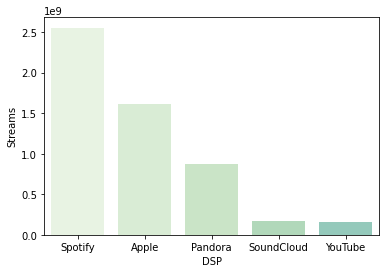

In [40]:
ax = sns.barplot(x="DSP", y="Streams", data=top_5, palette=sns.color_palette("GnBu", 10), order=top_5['DSP'])

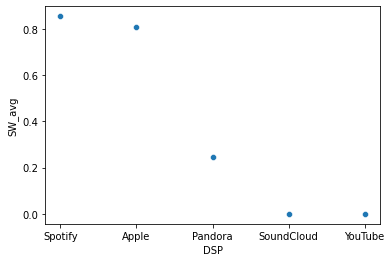

In [41]:
scatter= sns.scatterplot(data=top_5, x="DSP", y="SW_avg", palette=sns.color_palette("GnBu", 10))

In [42]:
violin = sns.violinplot(data=mlc, x = 'DSP', y='Songwriter?', hue,
                        inner='quart', linewidth=1,
                       palette={0:'b', 1:"r"}, split=True)
#sns.despine(left=True)

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_17816/463323295.py, line 3)